# Pytorch component

- torch: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- torch.autograd: 자동 미분 기능을 제공하는 라이브러리
- torch.nn: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- torch.multiprocessing: 병렬처리 기능을 제공하는 라이브러리
- torch.optim: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- torch.utils: 데이터 조작 등 유틸리티 기능 제공
- torch.onnx: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

# Tensors(텐서)

- 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
- 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
- Numpy의 ndarray와 유사
- GPU를 사용한 연산 가속 가능

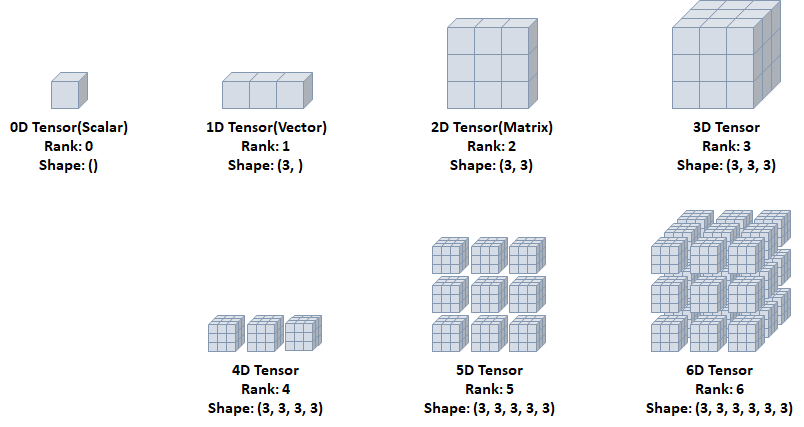

In [128]:
import torch

torch.__version__

'1.13.1+cu116'

# 텐서 초기화와 데이터 타입

In [129]:
# 초기화 되지 않은 텐서

x = torch.empty(4,2)
print(x)

tensor([[ 6.4961e+37,  4.5650e-41],
        [ 6.4961e+37,  4.5650e-41],
        [-2.3831e+17,  0.0000e+00],
        [ 1.8077e-43,  0.0000e+00]])


In [130]:
# 무작위로 초기화된 텐서

x = torch.rand(4,2)
print(x)

tensor([[0.1519, 0.3709],
        [0.8744, 0.2988],
        [0.6173, 0.0403],
        [0.3341, 0.6003]])


In [131]:
# dtype이 long이고 0으로 채워진 텐서

x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [132]:
# 사용자가 입력한 값으로 텐서 초기화

x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [133]:
# 2X4 크기, double 타입, 1로 채워진 텐서

x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [134]:
# x와 같은 크기, float 타입, 무작위로 채워진 텐서

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-1.2800,  1.0621, -0.0958, -0.1242],
        [-0.5453,  1.2366, -0.5394,  0.6766]])


In [135]:
# 텐서의 크기 계산
print(x.size())

torch.Size([2, 4])


# Data Type
  
  
| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [136]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [137]:
# Type casting
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [138]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [139]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


# CUDA Tensors

- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [140]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2725])
0.2724805176258087
torch.float32


In [141]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([0.2725], device='cuda:0')
tensor([1.2725], device='cuda:0')
tensor([1.2725], dtype=torch.float64)


# 다차원 텐서 표현

## 0D Tensor(Scalar)

- 하나의 숫자를 담고 있는 tensor
- 축과 형상이 없음

In [142]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


## 1D Tensor(Vector)

- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재



In [143]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


## 2D Tensor(Matrix)

- 행렬과 같은 모양으로 두 개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

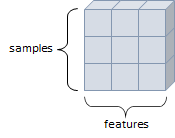

In [144]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


## 3D Tensor

- 큐브(Cube)와 같은 모양으로 세 개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(sample), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

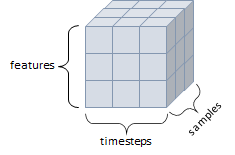


In [145]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


## 4D Tensor

- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(sample), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

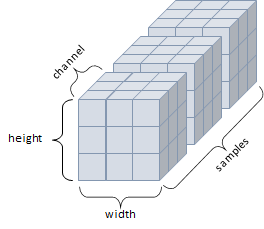

## 5D Tensor

- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

# 텐서의 연산(Operations)

- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [146]:
import math

a = torch.rand(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5)) # 찝어버리기

tensor([[0.5103, 0.9031]])
tensor([[0.5103, 0.9031]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.5000]])


In [147]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

tensor([[0.5103, 0.9031]])
tensor(0.5103)
tensor(0.9031)
tensor(0.7067)
tensor(0.2777)
tensor(0.4609)
tensor([1, 2, 3])


### max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴  
- **argmax**: 최대값을 가진 인덱스  
- **argmin**: 최소값을 가진 인덱스

In [148]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0)) # column 기준
print(x.max(dim=1)) # row 기준

tensor([[0.3212, 0.0291],
        [0.4632, 0.2517]])
torch.return_types.max(
values=tensor([0.4632, 0.2517]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.3212, 0.4632]),
indices=tensor([0, 0]))


In [149]:
x = torch.rand(2,2)
print(x)
print(x.min(dim=0)) # column 기준
print(x.min(dim=1)) # row 기준

tensor([[0.7817, 0.6721],
        [0.0267, 0.6825]])
torch.return_types.min(
values=tensor([0.0267, 0.6721]),
indices=tensor([1, 0]))
torch.return_types.min(
values=tensor([0.6721, 0.0267]),
indices=tensor([1, 0]))


In [150]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[0.8360, 0.3128],
        [0.9827, 0.9335]])


In [151]:
print(x+y)
print(torch.add(x,y))

tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])


### 결과 텐서를 인자로 제공 (ex. x와 y를 더한 값을 result에 인자로 전달해줘) 

In [152]:
result = torch.empty(2,4)
torch.add(x,y,out=result) 
print(result)

tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])


<ipython-input-152-3e822fbe5581>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x,y,out=result)


### in-place 방식

- in-placce 방식으로 텐서의 값을 변경하는 연산 뒤에는 _"가 붙음
- x.copy_(y), x.t_()

In [153]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[0.8360, 0.3128],
        [0.9827, 0.9335]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])


In [154]:
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])
tensor([[-0.8360, -0.3128],
        [-0.9827, -0.9335]])
tensor([[-0.8360, -0.3128],
        [-0.9827, -0.9335]])
tensor([[-0.8360, -0.3128],
        [-0.9827, -0.9335]])


In [155]:
print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])
tensor([[0.7353, 0.6597],
        [0.3345, 1.1350]])
tensor([[0.7353, 0.6597],
        [0.3345, 1.1350]])
tensor([[0.7353, 0.6597],
        [0.3345, 1.1350]])


In [156]:
print(x)
print(y)
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])
tensor([[0.3906, 0.6819],
        [0.2140, 0.4273]])
tensor([[0.3906, 0.6819],
        [0.2140, 0.4273]])
tensor([[0.3906, 0.6819],
        [0.2140, 0.4273]])


In [157]:
print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[0.5359, 0.6707],
        [0.2675, 0.6964]])
tensor([[1.3719, 0.9835],
        [1.2502, 1.6299]])
tensor([[1.5738, 1.6203],
        [1.2377, 1.3982]])
tensor([[1.5738, 1.6203],
        [1.2377, 1.3982]])
torch.return_types.svd(
U=tensor([[-0.7708, -0.6371],
        [-0.6371,  0.7708]]),
S=tensor([2.9299, 0.0666]),
V=tensor([[-0.6832, -0.7303],
        [-0.7303,  0.6832]]))


# 텐서의 조작(Manipulations)

### 인덱싱(Indexing): Numpy처럼 인덱싱 형태로 사용가능

In [158]:
x = torch.Tensor([[1,2],
                 [3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

print(x[:,0])
print(x[:,1])

print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


### view: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [159]:
x = torch.randn(4,5)
print(x)
y = x.view(20)
print(y)
z = x.view(5,-1)
print(z)

tensor([[ 0.1079, -1.0102, -0.1664,  0.9620,  0.6319],
        [ 0.3076,  0.9272,  1.6318,  0.3209, -0.4445],
        [-0.2955,  0.1272, -0.2498,  0.7688,  0.2893],
        [ 1.4286,  0.7659,  0.1830, -0.3868, -1.7139]])
tensor([ 0.1079, -1.0102, -0.1664,  0.9620,  0.6319,  0.3076,  0.9272,  1.6318,
         0.3209, -0.4445, -0.2955,  0.1272, -0.2498,  0.7688,  0.2893,  1.4286,
         0.7659,  0.1830, -0.3868, -1.7139])
tensor([[ 0.1079, -1.0102, -0.1664,  0.9620],
        [ 0.6319,  0.3076,  0.9272,  1.6318],
        [ 0.3209, -0.4445, -0.2955,  0.1272],
        [-0.2498,  0.7688,  0.2893,  1.4286],
        [ 0.7659,  0.1830, -0.3868, -1.7139]])


### item: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [160]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.1933])
0.19327762722969055
torch.float32


### 단, scalar 값 하나만 존재해야 item() 사용 가능

In [161]:
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([-0.1524, -1.2237])
torch.float32


### squeeze: 차원을 축소(제거)

In [162]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.0439, 0.3778, 0.8204],
         [0.2100, 0.9436, 0.6153],
         [0.3413, 0.6998, 0.2809]]])
torch.Size([1, 3, 3])


In [163]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.0439, 0.3778, 0.8204],
        [0.2100, 0.9436, 0.6153],
        [0.3413, 0.6998, 0.2809]])
torch.Size([3, 3])


### unsqueeze: 차원을 증가(생성)

In [164]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.1189, 0.1726, 0.4434],
        [0.7766, 0.5604, 0.5763],
        [0.7873, 0.9548, 0.0536]])
torch.Size([3, 3])


In [165]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.1189, 0.1726, 0.4434],
         [0.7766, 0.5604, 0.5763],
         [0.7873, 0.9548, 0.0536]]])
torch.Size([1, 3, 3])


In [166]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.1189],
         [0.1726],
         [0.4434]],

        [[0.7766],
         [0.5604],
         [0.5763]],

        [[0.7873],
         [0.9548],
         [0.0536]]])
torch.Size([3, 3, 1])


### stack: 텐서간 결합

In [167]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat: 텐서를 결합하는 메소드(concatenate)

- Numpy의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [168]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[-0.4614,  0.5290, -0.4249],
         [ 0.9348, -1.1447,  1.8849],
         [ 0.9320,  0.4007,  1.1424]]])
tensor([[[ 0.4691, -0.1987,  0.2228],
         [ 1.9615, -0.6454,  0.9112],
         [-2.0513,  1.1155, -1.1627]]])
tensor([[[-0.4614,  0.5290, -0.4249],
         [ 0.9348, -1.1447,  1.8849],
         [ 0.9320,  0.4007,  1.1424]],

        [[ 0.4691, -0.1987,  0.2228],
         [ 1.9615, -0.6454,  0.9112],
         [-2.0513,  1.1155, -1.1627]]])
torch.Size([2, 3, 3])


In [169]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[-0.4614,  0.5290, -0.4249],
         [ 0.9348, -1.1447,  1.8849],
         [ 0.9320,  0.4007,  1.1424],
         [ 0.4691, -0.1987,  0.2228],
         [ 1.9615, -0.6454,  0.9112],
         [-2.0513,  1.1155, -1.1627]]])
torch.Size([1, 6, 3])


In [170]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[-0.4614,  0.5290, -0.4249,  0.4691, -0.1987,  0.2228],
         [ 0.9348, -1.1447,  1.8849,  1.9615, -0.6454,  0.9112],
         [ 0.9320,  0.4007,  1.1424, -2.0513,  1.1155, -1.1627]]])
torch.Size([1, 3, 6])


### chunk: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [171]:
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.6213, 0.9596, 0.3050, 0.8218, 0.2713, 0.2451],
        [0.3132, 0.2120, 0.9640, 0.8415, 0.8765, 0.5727],
        [0.2806, 0.0219, 0.9041, 0.9288, 0.9302, 0.7855]])
tensor([[0.6213, 0.9596],
        [0.3132, 0.2120],
        [0.2806, 0.0219]])
tensor([[0.3050, 0.8218],
        [0.9640, 0.8415],
        [0.9041, 0.9288]])
tensor([[0.2713, 0.2451],
        [0.8765, 0.5727],
        [0.9302, 0.7855]])


### split: chunk와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [172]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8074, 0.5021, 0.6676, 0.4495, 0.4310, 0.3287],
        [0.3780, 0.2418, 0.9407, 0.7371, 0.9308, 0.4143],
        [0.1788, 0.3696, 0.6501, 0.9367, 0.3266, 0.9325]])
tensor([[0.8074, 0.5021, 0.6676],
        [0.3780, 0.2418, 0.9407],
        [0.1788, 0.3696, 0.6501]])
tensor([[0.4495, 0.4310, 0.3287],
        [0.7371, 0.9308, 0.4143],
        [0.9367, 0.3266, 0.9325]])


### torch <-> numpy

- Torch tensor를 Numpy array로 변환 가능
  - numpy()
  - from_numpy()
- Tensor가 CPU상에 있다면 numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [173]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [174]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [175]:
# torch로 선언한 a의 값에 변동을 주더라도 a.numpy()로 지정한 변수 b도 같이 변동됨
# 이는 tensor가 cpu에 있을 때 같은 메모리 공간을 공유하기 때문에 동시에 같이 변동되는 현상임

a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [176]:
# 반대도 성립

import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

## Tensor

- data: tensor형태의 데이터
- grad: data가 거쳐온 layer에 대한 미분값 저장
- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)
- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작  
- 계산이 완료된 후, .backward()를 호출하면 자동으로 gradient를 계산할 수 있으며, .grad 속성에 누적됨
- 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리
- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용
- Autograd 구현에서 매우 중요한 클래스: `Function` 클래스

In [177]:
import torch

In [178]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [179]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [180]:
print(y.grad_fn)

In [181]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


`requires+grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

In [182]:
a = torch.randn(3,3)

a = ((a*3) / (a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


## 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [183]:
print(x.grad)

None


In [184]:
x = torch.randn(3, requires_grad=True)

y = x * 2

while y.data.norm() < 1000:
  y = y*2

print(y)

tensor([-470.9282, -547.4462, -843.6215], grad_fn=<MulBackward0>)


In [185]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [186]:
# torch.no_grad()를 통해 gradient를 update하지 않음

print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [187]:
# detach(): 내용물(content)은 같지만 requires_grad가 다른 새로운 Tensor를 가져올 때

print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [188]:
import torch

In [189]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [190]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [191]:
print("a.data:",a.data)
print("a.grad:",a.grad)
print('a.grad_fn',a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: None
a.grad_fn None


In [192]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [193]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [194]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [195]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [196]:
print("a.data:",a.data)
print("a.grad:",a.grad)
print('a.grad_fn',a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [197]:
print("b.data:",b.data)
print("b.grad:",b.grad)
print('b.grad_fn',b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn <AddBackward0 object at 0x7f409015fa60>


<ipython-input-197-131433f18bcf>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("b.grad:",b.grad)


In [198]:
print("c.data:",c.data)
print("c.grad:",c.grad)
print('c.grad_fn',c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn <PowBackward0 object at 0x7f4090166070>


<ipython-input-198-1b0274c8622d>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("c.grad:",c.grad)


In [199]:
print("out.data:",out.data)
print("out.grad:",out.grad)
print('out.grad_fn',out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn <SumBackward0 object at 0x7f4090166730>


<ipython-input-199-9147e3331856>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("out.grad:",out.grad)


### 자동 미분 흐름 다시 보기(2)

- `grad`값을 넣어서 `backward`
- 아래의 코드에서 `.grad`값이 None은 gradient 값이 필요하지 않기 때문



In [200]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y **2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [201]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [202]:
print("x.data:",x.data)
print("x.grad:",x.grad)
print('x.grad_fn',x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [203]:
print("y.data:",y.data)
print("y.grad:",y.grad)
print('y.grad_fn',y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn <PowBackward0 object at 0x7f4090169340>


<ipython-input-203-02b76826b319>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("y.grad:",y.grad)


In [204]:
print("z.data:",z.data)
print("z.grad:",z.grad)
print('z.grad_fn',z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn <AddBackward0 object at 0x7f4090169910>


<ipython-input-204-2fe71c514160>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("z.grad:",z.grad)


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름
- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음
- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음
- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
`torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능

## nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때
  - 따라서, `weight`값들을 직접 선언 안함

In [205]:
import torch
import torch.nn as nn

In [206]:
# Convolution layer

m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))

m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [207]:
output.shape

torch.Size([20, 33, 26, 100])

## nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

In [208]:
import torch
import torch.nn.functional as F

In [209]:
filters = torch.randn(8,4,3,3)

In [210]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드
- `transforms`에서 제공하는 클래스 이외에  
일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [211]:
import torch
import torchvision
import torchvision.transforms as transforms

In [212]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

In [213]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [214]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)

In [215]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [216]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

# (중요) torch에서는 channel(채널)이 앞에 옴
- `channel first`
- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

In [217]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [218]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [219]:
image = torch_image.numpy()
image.shape

(28, 28)

In [220]:
label = labels

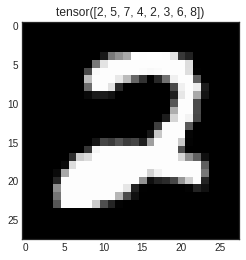

In [221]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 layer 설명

In [222]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## nn.Conv2d
- `in_channels`: channel의 갯수
- `out_channels`: 출력 channel의 갯수
- `kernel_size`: 커널(필터) 사이즈
- tensorflow, keras와 다르게 layer의 `input`인자에도 값을 집어 넣어줘야함

In [223]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [224]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [225]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [226]:
weight = weight.detach()

In [227]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

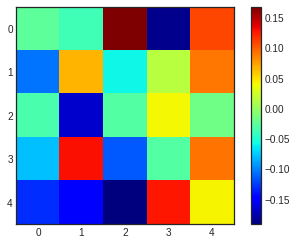

In [228]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [229]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [230]:
input_image = torch.unsqueeze(images[0], dim=0)

In [231]:
output_data = layer(input_image)

In [232]:
output = output_data.data

In [233]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

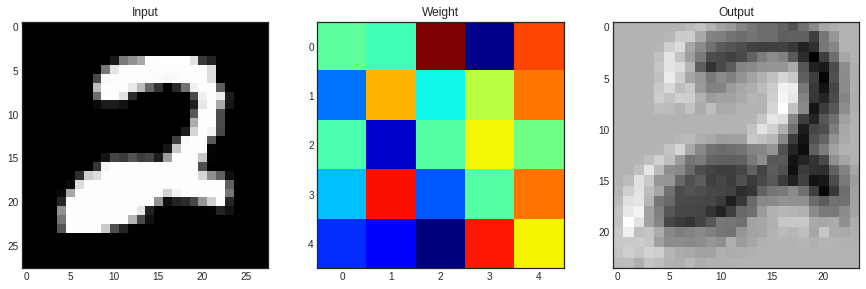

In [234]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

## Pooling

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d`도 많이 사용

In [235]:
image.shape

(28, 28)

In [236]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

MaxPool Layer는 weight가 없기 때문에 바로 `numpy()` 변환 가능

In [237]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

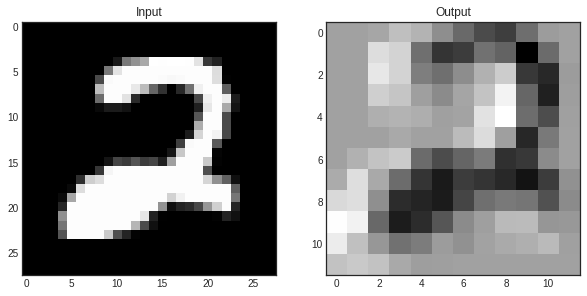

In [238]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

## Linear

- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [239]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [240]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [241]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [242]:
lin

tensor([[ 0.8660, -0.1765,  1.1391, -0.9469, -0.4647, -0.2237,  0.3600, -1.3944,
         -1.1326, -0.6031]], grad_fn=<AddmmBackward0>)

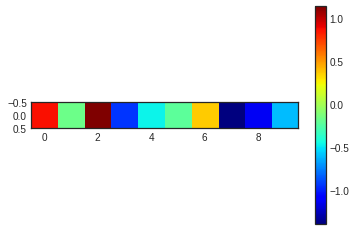

In [243]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

## Softmax

In [244]:
with torch.no_grad():
  flatten = image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [245]:
softmax

tensor([[0.0551, 0.0235, 0.0504, 0.1496, 0.0559, 0.1654, 0.2298, 0.0547, 0.1072,
         0.1084]])

In [246]:
import numpy as np

np.sum(softmax.numpy())

0.99999994

In [247]:
inputs = torch.randn(4,3,28,28).to(torch.device('cuda'))
inputs.shape

torch.Size([4, 3, 28, 28])

In [248]:
layer = nn.Conv2d(3,20,5,1).to(torch.device('cuda'))
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

